Text(0.5,1,'caspase')

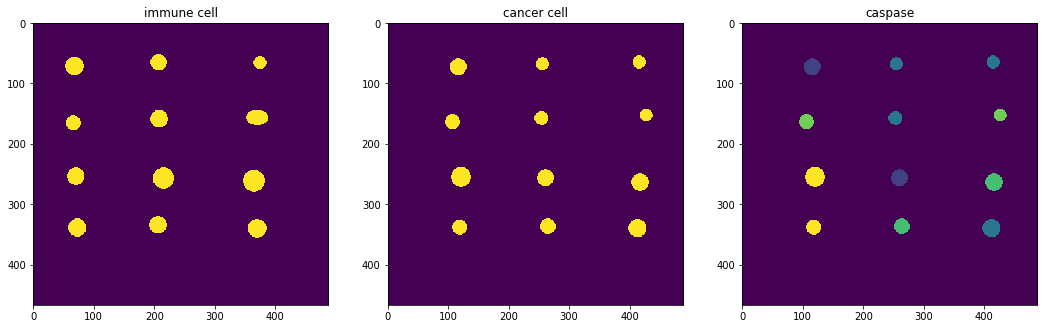

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


immune = cv2.imread("dummy_immune_cancer_red.bmp",cv2.IMREAD_GRAYSCALE)
cancer = cv2.imread("dummy_immune_cancer_green.bmp",cv2.IMREAD_GRAYSCALE)
caspase = cv2.imread("dummy_immune_cancer_blue.bmp",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(18, 12)) 
plt.subplot(131)
plt.imshow(immune)
plt.title("immune cell")
plt.subplot(132)
plt.imshow(cancer)
plt.title("cancer cell")
plt.subplot(133)
plt.imshow(caspase)
plt.title("caspase")

Text(0.5,1,'caspase')

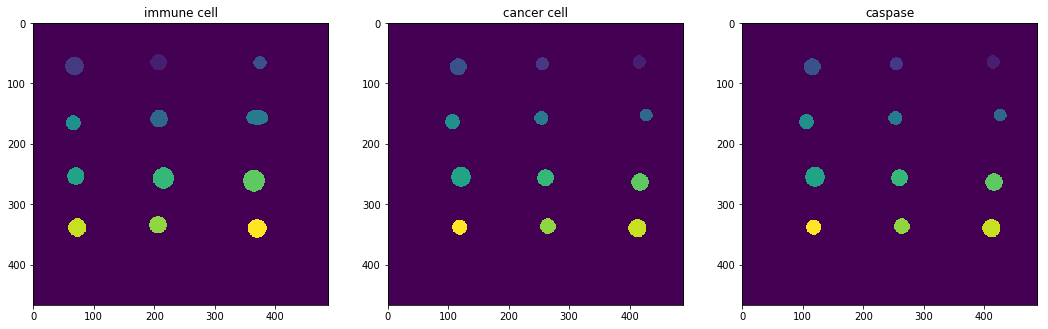

In [29]:
im_list = [immune, cancer, caspase]
label_num=[]
label_images=[]
data_list=[]
center_list=[]

for tmp_img in im_list:
    tmp_nLabels, tmp_labelimage, tmp_data, tmp_center = cv2.connectedComponentsWithStats(tmp_img)

    label_num.append(tmp_nLabels)
    label_images.append(tmp_labelimage)
    data_list.append(tmp_data)
    center_list.append(tmp_center)
    
    
#ラベルの数。各オブジェクトに番号がラベリングされており、nlabels はそのラベルの数を表す。
#ただし、画像の背景の番号は 0 とラベリングされているので、実際のオブジェクトの数は nlabels - 1 となる。
plt.figure(figsize=(18, 12)) 
plt.subplot(131)
plt.imshow(label_images[0])
plt.title("immune cell")
plt.subplot(132)
plt.imshow(label_images[1])
plt.title("cancer cell")
plt.subplot(133)
plt.imshow(label_images[2])
plt.title("caspase")

In [34]:
print(label_images[2].max())

12


In [31]:
print(center_list[1])
print(center_list[2])

[[243.67011415 233.35677622]
 [414.5         65.5       ]
 [254.5         68.5       ]
 [115.54411765  73.54411765]
 [426.         153.        ]
 [253.02409639 158.02409639]
 [106.         164.        ]
 [120.02702703 255.02702703]
 [259.54411765 256.54411765]
 [416.03016591 264.03016591]
 [263.53018868 336.53018868]
 [411.5579096  339.5579096 ]
 [118.         338.        ]]
[[243.67011415 233.35677622]
 [414.5         65.5       ]
 [254.5         68.5       ]
 [115.54411765  73.54411765]
 [426.         153.        ]
 [253.02409639 158.02409639]
 [106.         164.        ]
 [120.02702703 255.02702703]
 [259.54411765 256.54411765]
 [416.03016591 264.03016591]
 [263.53018868 336.53018868]
 [411.5579096  339.5579096 ]
 [118.         338.        ]]


In [3]:
print(center_list[0][0])

[244.88793899 233.58079383]


In [38]:
import sys
#immune cellの重心座標リスト
#print(center_list[0])

#cancer cellの重心座標リスト
#print(center_list[1])

#immune cellの数
cell_num = len(center_list[0])

#これらから、最近接の細胞同士のIDを紐付ける

offset = 1 

for cur_id,at in enumerate(center_list[0][offset:],offset):
    #暫定最近接距離格納用リスト
    tmp_min=[]
    #print(cur_id,at)
    for i in range(1,cell_num):
        #print(i)
        #print(at[0])
        #print(center_list[1][i,0])
        x_range = at[0] - center_list[1][i,0]
        y_range = at[1] - center_list[1][i,1]
        #print(x_range,y_range)
        tmp_len = np.sqrt(x_range * x_range + y_range * y_range)
        #print(tmp_1en)
        tmp_min.append(tmp_len)
        
        #if tmp_len > 10:
        #   tmp_min.append(tmp_len)
        
        
    #1点に対する距離計算終了・格納後、
    #注目しているimmune cellと１番距離の小さいcancer cellのidを紐付ける
    else:
        tmp_min = np.array(tmp_min)
        tmp_min_idx = np.argmin(tmp_min)
        #print(len(tmp_min),tmp_min_idx,tmp_min)
        print("current immune cell id:{}, nearest cancer cell id:{}".format(cur_id,tmp_min_idx+1))
        print("最近接免疫細胞座標:{}, がん細胞座標:{}, 距離:{}".format(center_list[0][cur_id],center_list[1][tmp_min_idx+1],tmp_min.min()))
        
        cur_cancer_cell_mask = np.where(label_images[1]==tmp_min_idx+1,caspase,0)
        
        print("がん細胞内の輝度値総和:{}".format(np.sum(cur_cancer_cell_mask)))
        #print(center_list[0][cur_id],center_list[1][tmp_min_idx+1],tmp_min.min())
        print()
        


current immune cell id:1, nearest cancer cell id:2
最近接免疫細胞座標:[207.06654991  66.06654991], がん細胞座標:[254.5  68.5], 距離:47.49582999104507
がん細胞内の輝度値総和:37600

current immune cell id:2, nearest cancer cell id:3
最近接免疫細胞座標:[68. 72.], がん細胞座標:[115.54411765  73.54411765], 距離:47.56918563676836
がん細胞内の輝度値総和:30600

current immune cell id:3, nearest cancer cell id:1
最近接免疫細胞座標:[374.5  66.5], がん細胞座標:[414.5  65.5], 距離:40.01249804748511
がん細胞内の輝度値総和:37600

current immune cell id:4, nearest cancer cell id:5
最近接免疫細胞座標:[208.03016591 159.03016591], がん細胞座標:[253.02409639 158.02409639], 距離:45.005176983369
がん細胞内の輝度値総和:41500

current immune cell id:5, nearest cancer cell id:4
最近接免疫細胞座標:[370.00684932 157.03013699], がん細胞座標:[426. 153.], 距離:56.137998964638896
がん細胞内の輝度値総和:68200

current immune cell id:6, nearest cancer cell id:6
最近接免疫細胞座標:[ 66. 166.], がん細胞座標:[106. 164.], 距離:40.049968789001575
がん細胞内の輝度値総和:97800

current immune cell id:7, nearest cancer cell id:7
最近接免疫細胞座標:[ 70.03016591 254.03016591], がん細胞座標:[120.02702703 2